# Generate random numbers

Random numbers are used to model uncertainty in simulation. Randomness is described through random variables, which are drawn from probability distributions.

In [1]:
# import numpy library
import numpy as np
# import matplotlib library
import matplotlib.pyplot as plt
# import seaborn library
import seaborn as sns
# import distributions from scipy stats for plotting pdfs
from scipy.stats import expon, poisson, gamma, binom, beta, triang

In [2]:
# set random state so repeatable results
np.random.seed(42)

In [3]:
# set samples to draw
samples=1000

In [4]:
# set to plot automatically
%matplotlib inline

In [5]:
# define function to plot series
def plot_series(series,bins):
    n,bin_edges,patches = plt.hist(series,bins,normed=True);
    plt.xlabel('Random variable X');
    plt.ylabel('Probability density f(x)');

# Random numbers from discrete distribution

Generating discrete distributions where probablities are known for an event occuring.

In [6]:
# set values to be drawn
values = [1,2,4,7]
# set probabilities of values being drawn, should add up to 1
probabilities = [0.3,0.2,0.3,0.2]
# generate 1000 samples from a discrete distribution
discrete_random = np.random.choice(values,samples,p=probabilities)

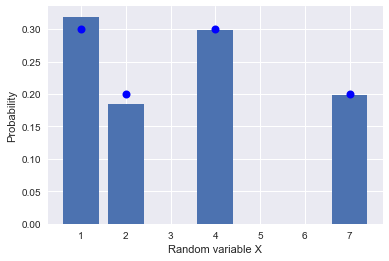

In [7]:
# plot simulated values as bar chart versus actual pdf (dots)
unique_elements, counts_elements = np.unique(discrete_random, return_counts=True);
plt.bar(unique_elements,counts_elements/samples);
plt.plot(values, probabilities, 'bo', ms=8, label='discrete pmf')
plt.xlabel('Random variable X');
plt.ylabel('Probability');

# Random numbers from uniform distribution U(0,1)

For a uniform distribution every value between a defined range has an equal chance of being drawn.

In [8]:
# generate 1000 samples from uniform distribution, on range 0-1
uniform_random = np.random.uniform(0,1,size=samples)

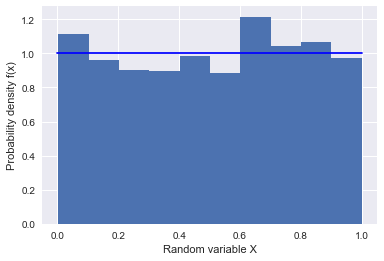

In [9]:
# plot simulated values as histogram versus actual pdf (line)
plot_series(uniform_random,10);
plt.plot([0., 1], [1, 1], "b-");

# Random numbers from normal distribution

Generate values from a normal distribution. This distribution often appears in nature and has an ability to approximate other distributions (through central limit theorem)

In [10]:
# generate 1000 samples from a standard normal distribution
standard_normal_random = np.random.randn(samples)
# generate 1000 samples from normal distribution with mean 1 and standard deviation 2
normal_random = np.random.normal(1,2,samples)

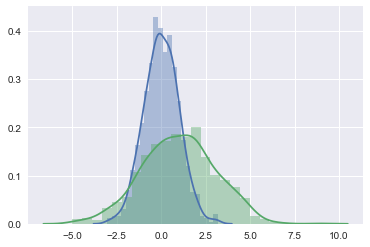

In [11]:
# plot simulated values as histogram versus actual pdf (line)
sns.distplot(standard_normal_random);
sns.distplot(normal_random);

# Random numbers from exponential distribution

Generate random values from an exponential distribution, which is useful for inter-arrival times. For example, the time between two customers arriving. This is often used in queuing simulations.

In [12]:
# set distribution parameter
scale = 0.5
# generate 1000 samples from an exponential distribution
exponential_random = np.random.exponential(scale=scale,size=samples)

In [13]:
# create x and y values for the actual pdf so we can plot them
x = np.linspace(expon.ppf(0.0001,scale=scale),expon.ppf(0.9999,scale=scale))
y = expon.pdf(x,scale=scale)

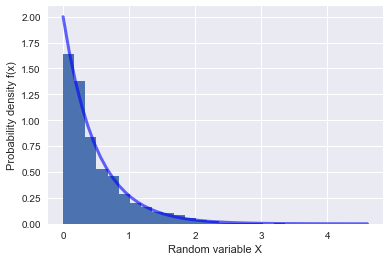

In [14]:
# plot simulated values as histogram versus actual pdf (line)
plot_series(exponential_random,20);
plt.plot(x, y,'b-', lw=3, alpha=0.6, label='exponential pdf');

# Random numbers from poisson distribution

Generate random values from an poisson distribution. Useful for identifying probability that an event occurs in a given time.

In [15]:
# set distribution parameter
lam =3
# generate 1000 samples from a poisson distribution
poisson_random = np.random.poisson(lam=lam, size=samples)

In [16]:
# create x and y values for the actual pdf so we can plot them
x = np.arange(poisson.ppf(0.01, lam),poisson.ppf(0.9999, lam))
y = poisson.pmf(x,lam)

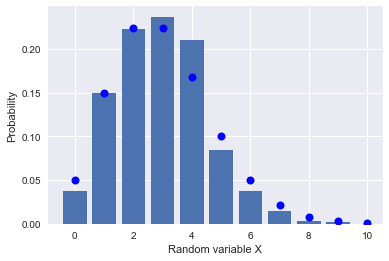

In [17]:
# plot simulated values as bar chart versus actual pdf (dots)
unique_elements, counts_elements = np.unique(poisson_random, return_counts=True);
plt.bar(unique_elements,counts_elements/samples);
plt.plot(x, y, 'bo', ms=8, label='poisson pmf')
plt.xlabel('Random variable X');
plt.ylabel('Probability');

# Random numbers from the binomial distribution distribution

Generate random numbers from a binomial distribution.

In [18]:
# set number of trials
trials = 100
# set probability of success
probability = 0.35
# generate 1000 samples from a binomial distribution
binomial_random = np.random.binomial(trials, probability,samples)

In [19]:
# create x and y values for the actual pdf so we can plot them
x = np.arange(binom.ppf(0.0001, trials, probability), binom.ppf(0.9999, trials, probability))
y = binom.pmf(x, trials, probability)

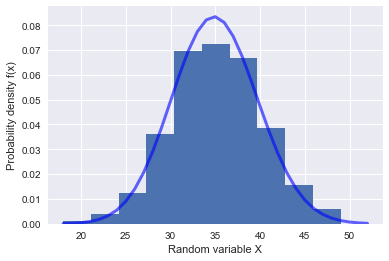

In [20]:
# plot simulated values as histogram versus actual pdf (line)
plot_series(binomial_random,10);
plt.plot(x, y,'b-', lw=3, alpha=0.6, label='binomial pdf');

# Random numbers from the gamma distribution

Gamma distribution is often used to model skewed positive distributions.

In [21]:
# set distribution parameters
scale=1.2
shape=10
# generate 1000 samples from a gamma distribution
gamma_random = np.random.gamma(shape=shape, scale=scale,size=samples)

In [22]:
# create x and y series for the actual pdf so we can plot them
x = np.linspace(gamma.ppf(0.0001, shape,scale=scale),gamma.ppf(0.9999, shape,scale=scale), 100)
y = gamma.pdf(x, shape,scale=scale)

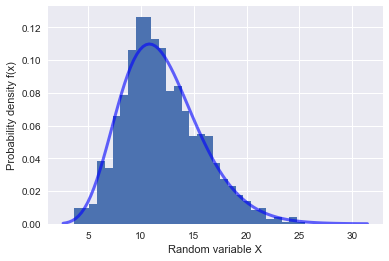

In [23]:
# plot simulated values as histogram versus actual pdf (line)
plot_series(gamma_random,30)
plt.plot(x, y,'b-', lw=3, alpha=0.6, label='gamma pdf');

# Random numbers from the beta distribution

Generate random numbers from a beta distribution

In [24]:
# set distribution parameters
a = 2
b = 8
# draw 1000 samples from beta distribution
beta_random = np.random.beta(a, b, samples)

In [25]:
# create x and y series for the actual pdf so we can plot them
x = np.linspace(beta.ppf(0.0001, a, b),beta.ppf(0.9999, a,b), 100)
y = beta.pdf(x, a, b)

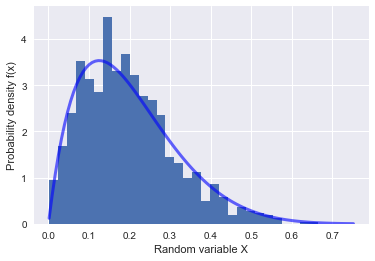

In [26]:
# plot simulated values as histogram versus actual pdf (line)
plot_series(beta_random,30)
plt.plot(x, y,'b-', lw=3, alpha=0.6, label='beta pdf');

# Random numbers from triangular distribution

Generate random numbers from a triangular distribution.

In [27]:
# set distribution parameters
lower=-5
middle=7
upper=13
# draw 1000 samples from triangular distribution
triangular_random = np.random.triangular(lower, middle, upper, samples)

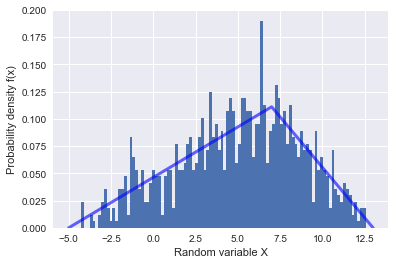

In [28]:
# plot simulated values as histogram versus actual pdf (line)
plot_series(triangular_random,100)
plt.plot([lower, middle,upper], [0, (2/(upper-lower)),0], 'b-', lw=3, alpha=0.6, label='triangular pdf');